# Evaluating iterative algorithms


Many generative methods (e.g., genetic algorithms) iteratively explore sequences to improve sequence fitness. One may be interested in visualizing the improvement across iterations/generations. Here we show how to evaluate sequences optimized across multiple rounds using seqme.

In [ ]:
import seqme as sm

## Single run

seqme allows naming sequence entries as a tuple. Here we name an entry using the following format: (model name, iteration).


In [ ]:
sequences = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

Let's define the metrics to compute.


In [ ]:
metrics = [
    sm.metrics.ID(predictor=sm.models.Charge(), name="Charge", objective="maximize"),
    sm.metrics.Uniqueness(),
]

Let's compute the metrics.


In [ ]:
df = sm.compute_metrics(sequences, metrics)

100%|██████████| 12/12 [00:00<00:00, 552.77it/s, data=('model 2', 3), metric=Uniqueness]


In [ ]:
sm.show_table(df, caption="Table 1. Iterative algorithms")

Let's visualize the sequences performance at each step.

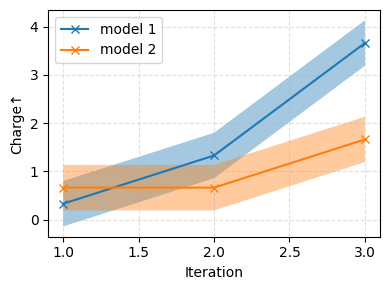

In [ ]:
sm.plot_series(df, "Charge")

## Multiple runs

Let's assume we ran two generative models multiple times with a different seed each time. The sequences from the runs are shown below. And now we want to compute the deviation in performance across runs.

In [ ]:
sequences_run1 = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_run2 = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_run3 = {
    ("model 1", 1): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 2): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_per_run = [sequences_run1, sequences_run2, sequences_run3]

Let's define the metrics to compute.


In [ ]:
metrics = [
    sm.metrics.ID(predictor=sm.models.Charge(), name="Charge", objective="maximize"),
    sm.metrics.Uniqueness(),
]

In [ ]:
df_per_run = [sm.compute_metrics(sequences, metrics) for sequences in sequences_per_run]

100%|██████████| 12/12 [00:00<00:00, 3570.13it/s, data=('model 2', 3), metric=Uniqueness]


Let's create a metric dataframe combining the metric dataframe of each run.

In [ ]:
df_combined_runs = sm.combine_metric_dataframes(df_per_run, on_overlap="mean")

In [ ]:
sm.show_table(df_combined_runs, caption="Table 2. Multiple runs")

Let's visualize the sequences performance at each iteration.

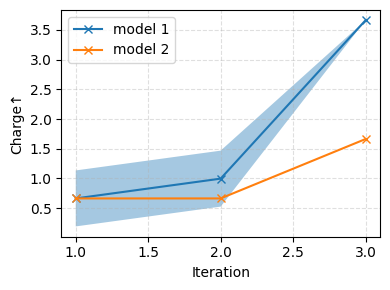

In [ ]:
sm.plot_series(df_combined_runs, "Charge")